In [37]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning) # this is to get rid of future error warnings that sometimes occur for users when using GridSearchCV.

In [38]:
from sklearn.datasets import load_breast_cancer 

breast_cancer, breast_cancer_target = load_breast_cancer(as_frame=True, return_X_y=True) # importing the dataset from sklearn

# Section 1: Exploring the data

- In this section we will explore the dataset, including looking at the correlation between the x variables (tumour cell properties) by plotting a heatmap. 
- Additionally, we will look at the separation between the x variables in a scatterplot.

In [39]:
breast_cancer.head() # loading the dataset to check the data

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [40]:
corr = breast_cancer.corr() # abbreviating correlation

<AxesSubplot:>

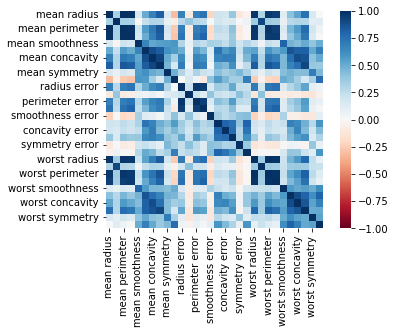

In [41]:
%matplotlib inline

import seaborn as sns

sns.heatmap(corr, vmin=-1.0, vmax=1.0, square=True, cmap="RdBu") # plotting a heatmap for correlated properties

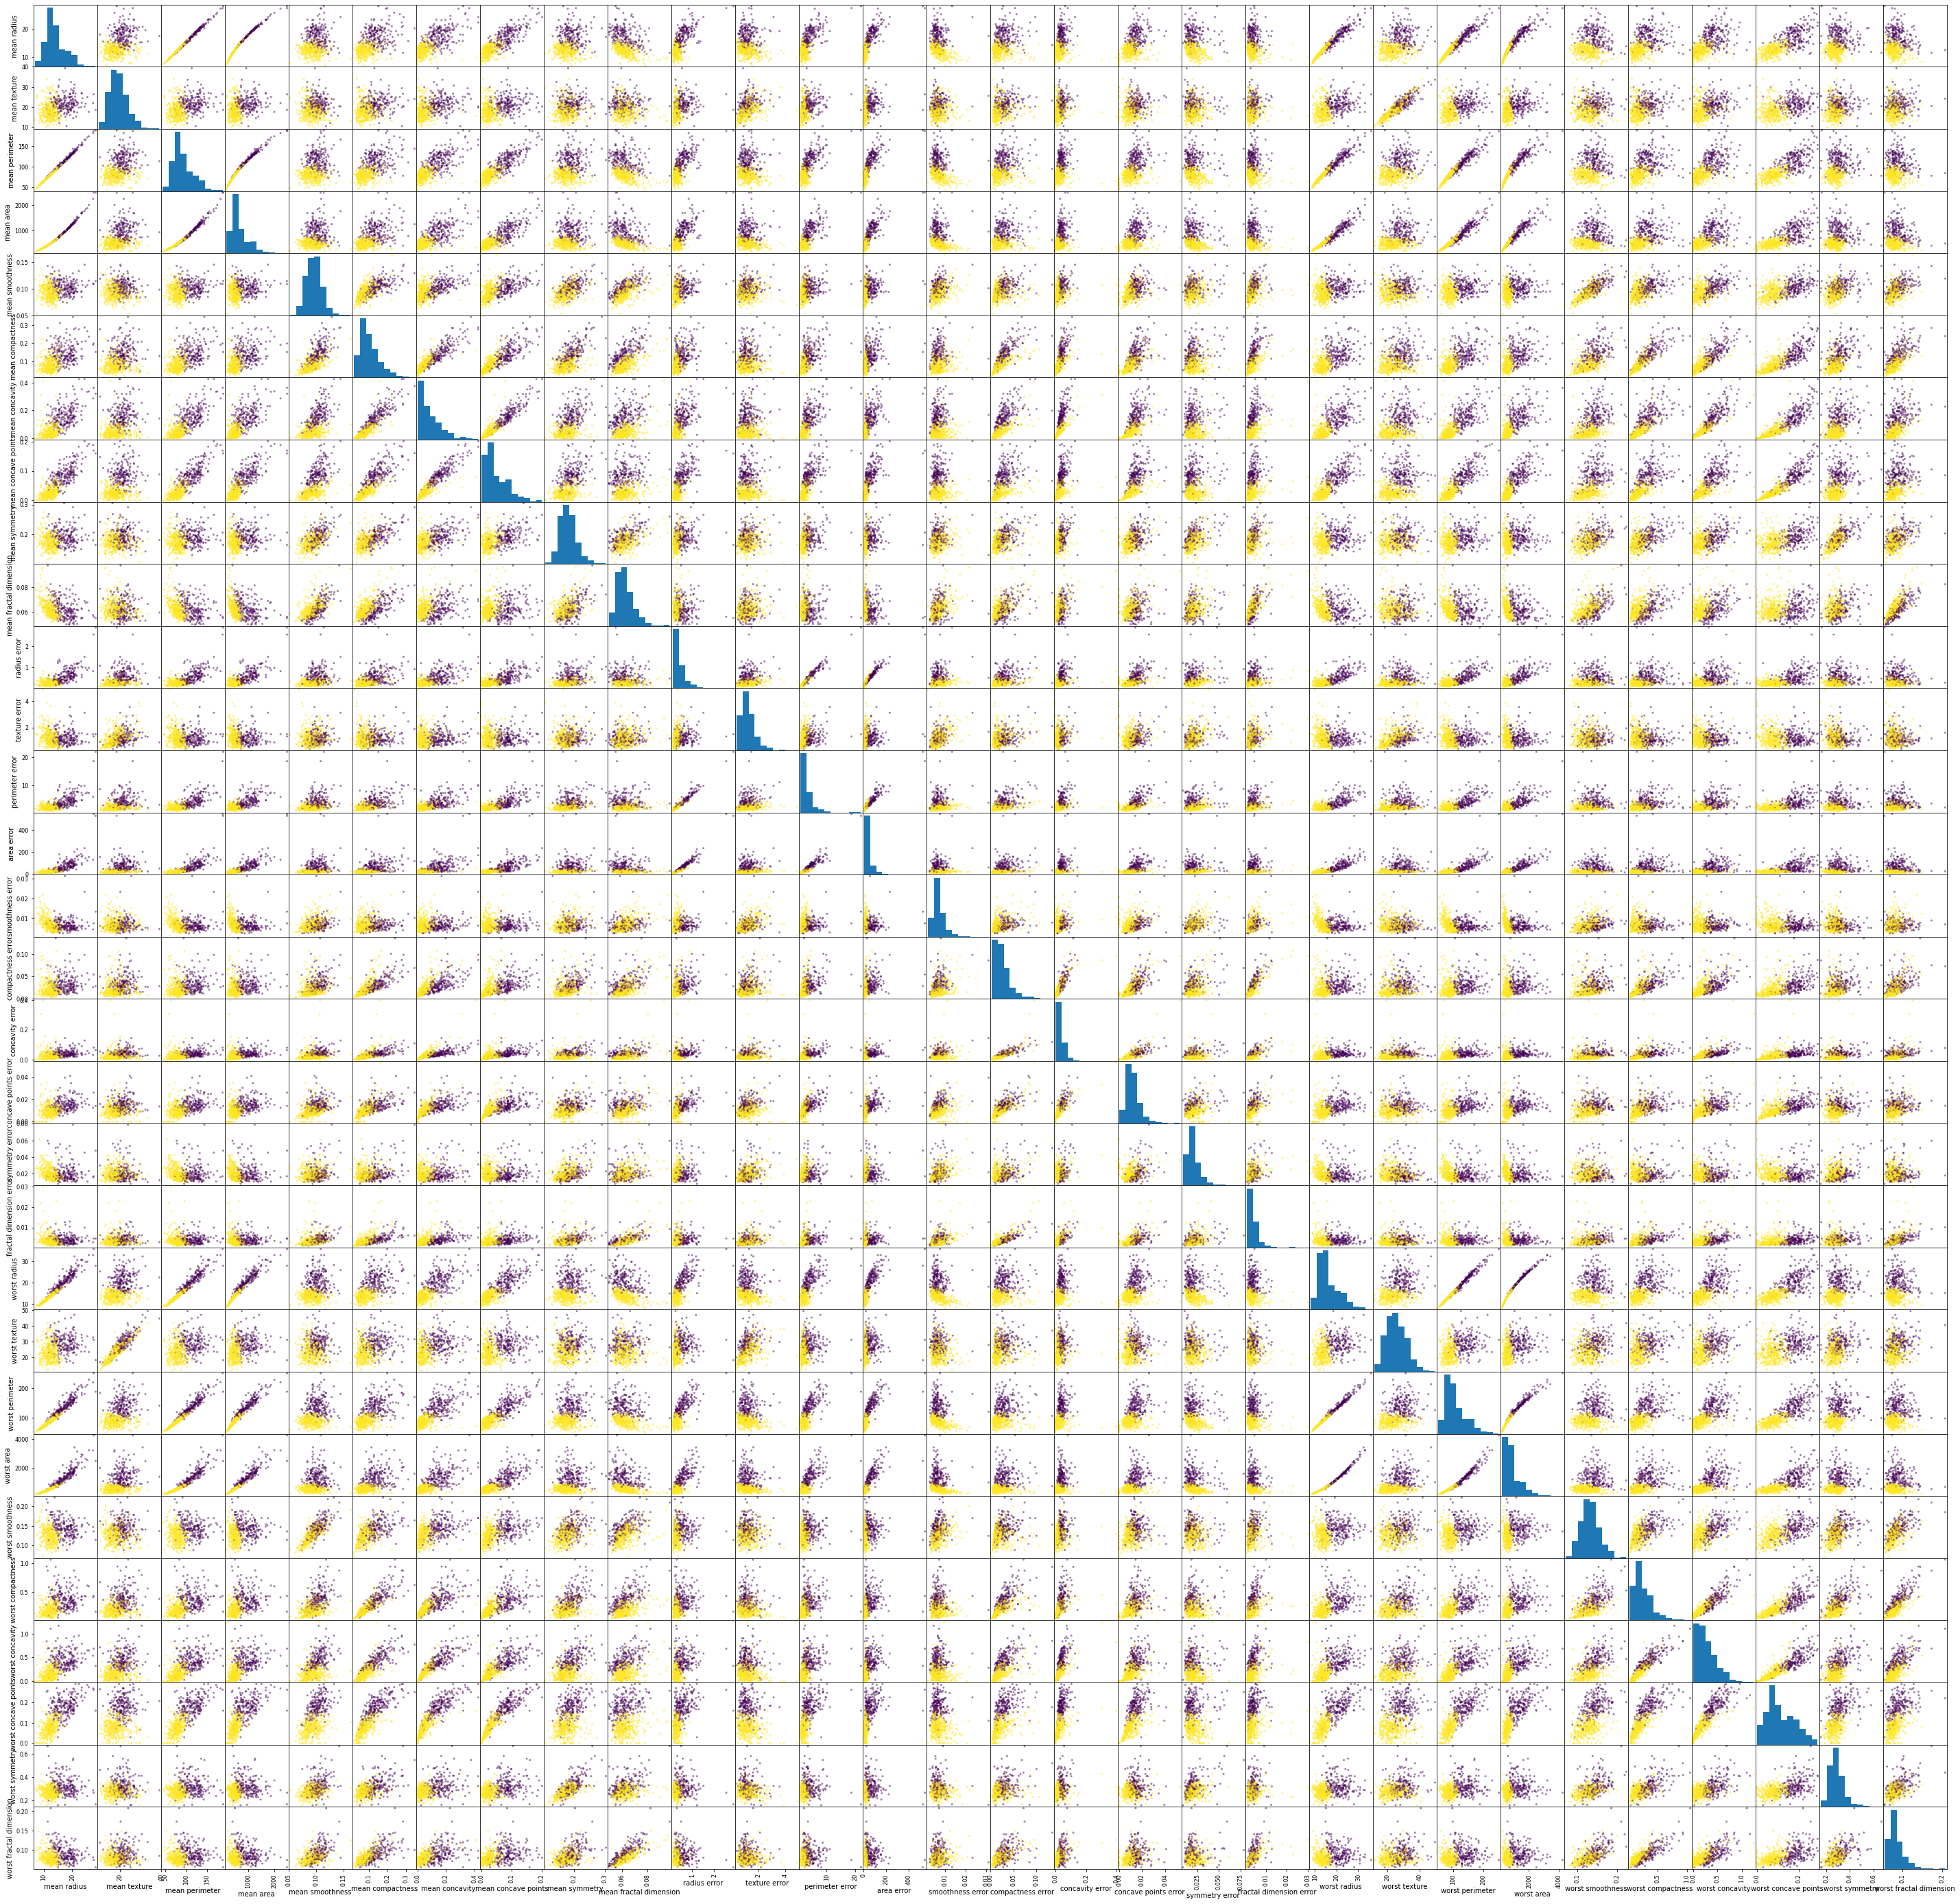

In [42]:
from pandas.plotting import scatter_matrix

a = scatter_matrix(breast_cancer, figsize=(50, 50), c =breast_cancer_target) # creating a scatterplot visualising the separation of datapoints for each paired property in the breast cancer dataset
# Please note: this may take a few mins to generate

# Section 2a: Generating a k nearest neighbors (knn) model

- In this section we will generate a knn model to predict if a tumour is benign or malignant based on paired x variables. 
- In the default code, these x variables are 'mean perimeter' and 'worst smoothness'.
- **But the user may replace these x variables with different ones**

<AxesSubplot:xlabel='mean perimeter', ylabel='worst smoothness'>

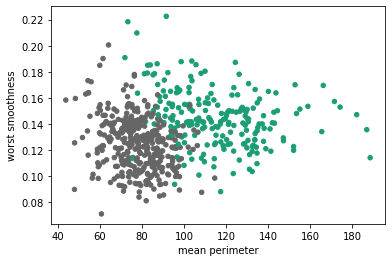

In [68]:
import pandas as pd
from sklearn.datasets import load_breast_cancer # loading in the breast cancer data - this is useful if I don't want to rerun the previous bits of code on correlation and the scatterplot
mp_ws = pd.DataFrame(breast_cancer, columns=["mean perimeter", "worst smoothness"]) 
mp_ws.plot.scatter("mean perimeter", "worst smoothness", c=breast_cancer_target, colormap="Dark2", colorbar=False) 
# plotting mean perimeter vs worst smoothness parameters, as these had good separation shown in the above scatterplot, but these can be replaced by any other x variable.

In [69]:
mp_ws # checking the paired x variable data is correct

mean perimeter  worst smoothness
0            122.80           0.16220
1            132.90           0.12380
2            130.00           0.14440
3             77.58           0.20980
4            135.10           0.13740
..              ...               ...
564          142.00           0.14100
565          131.20           0.11660
566          108.30           0.11390
567          140.10           0.16500
568           47.92           0.08996

[569 rows x 2 columns]

In [70]:
from sklearn.model_selection import train_test_split

train_mp_ws, test_mp_ws, train_breast_cancer_target, test_breast_cancer_target = train_test_split(mp_ws, breast_cancer_target, random_state = 42)
# splitting the data into a training and test set for both the x variables (mp_ws) and the y variable (breast_cancer_target).
# The random state = 42 is to allow the same random sample dataset each time we run the model, so we can get the same model score when we reuse the code. 

In [71]:
from sklearn.neighbors import KNeighborsClassifier # importing the nearest neighbors model

model = KNeighborsClassifier(n_neighbors=5) # setting the hyperparameters
model.fit(train_mp_ws, train_breast_cancer_target) # fitting the model by passing on the train dataset

KNeighborsClassifier()

In [72]:
model.score(test_mp_ws, test_breast_cancer_target) # this score checks the performance against the test dataset - an overall score of how good the model is

0.9230769230769231

In [73]:
X = mp_ws # setting the X variable so that don't have to change code further down

In [74]:
def plot_knn(model, X, y, resolution=100, ax=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    if X.shape[1] != 2:
        raise ValueError(f"X must have exactly two features to plot, you passed X.shape={X.shape}")
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)
    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]
    x1_range = np.linspace(x1.min()*1.1 - x1.max()*0.1, x1.max()*1.1 - x1.min()*0.1, resolution)
    x2_range = np.linspace(x2.min()*1.1 - x2.max()*0.1, x2.max()*1.1 - x2.min()*0.1, resolution)
    grid_x1_values, grid_x2_values = np.meshgrid(x1_range, x2_range)
    x_prime = np.column_stack((grid_x1_values.ravel(), grid_x2_values.ravel()))
    x_prime = pd.DataFrame(x_prime, columns=X.columns)
    y_hat = model.predict(x_prime).reshape(grid_x1_values.shape)

    if ax is None:
        fig, ax = plt.subplots()
    ax.pcolormesh(grid_x1_values, grid_x2_values, y_hat, cmap="Pastel2", alpha=1.0, shading="auto")
    X.plot.scatter(0, 1, c=y, colormap="Dark2", colorbar=False, alpha=0.8, ax=ax)
    # This cell contains the function to plot the knn - and we are passing on the trained model and the x and y data

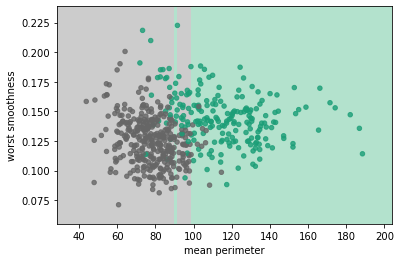

In [75]:
plot_knn(model, mp_ws, breast_cancer_target) # plotting the knn model

# Section 2b: Refining the knn model
- In this section we will refine the intial model using GridSearchCV.
- This will choose the best hyperparameters for the model.

In [76]:
from sklearn.model_selection import GridSearchCV #this is the tool that searches for the best hyperparameters
from sklearn.neighbors import KNeighborsClassifier #we import our model

parameters = {
    "n_neighbors" : range(1, 51),
} #and tell the tool what parameters we want to explore
clf = GridSearchCV(KNeighborsClassifier(), parameters)
clf.fit(train_mp_ws, train_breast_cancer_target) # fitting the gridsearch to our model

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51)})

param_n_neighbors  mean_test_score  std_test_score  rank_test_score
32                33         0.887278        0.035491                1
33                34         0.880274        0.030159                2
20                21         0.877948        0.041780                3
35                36         0.875595        0.037614                4
26                27         0.875595        0.038343                5

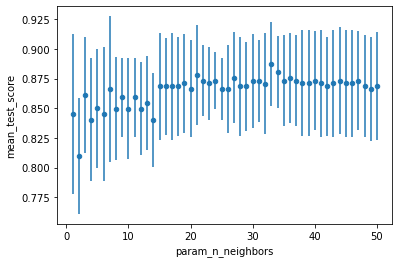

In [77]:
cv_results = pd.DataFrame(clf.cv_results_) # these are the results of the gridsearch to find the best parameters
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score") # here we can visualise the results as a scatter plot
cv_results = cv_results.sort_values(["rank_test_score", "mean_test_score"]) # here this ranks the best scores
cv_results.head()[["param_n_neighbors", "mean_test_score", "std_test_score", "rank_test_score"]] # and here we visualise these scores in a table


In [78]:
clf.score(test_mp_ws, test_breast_cancer_target) #testing the model against test data using the 'best' hyperparameter 

0.9230769230769231

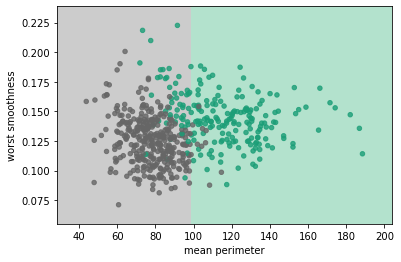

In [79]:
plot_knn(clf, mp_ws, breast_cancer_target) # plotting the knn model using the 'best' hyperparameter value

# Section 3a: Generating an alternative knn model
- In this section we will generate a 2nd model which will be compared to the model generated in section 2. 
- In the default code the x variables used to generate the knn model are 'mean area' and 'worst smoothness'
- **But if the user may replace these x variables with a different pair**

<AxesSubplot:xlabel='mean area', ylabel='worst smoothness'>

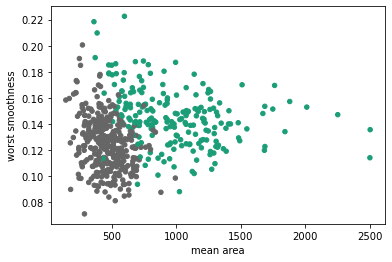

In [93]:
import pandas as pd
from sklearn.datasets import load_breast_cancer 
ma_ws = pd.DataFrame(breast_cancer, columns=["mean area", "worst smoothness"]) 
ma_ws.plot.scatter("mean area", "worst smoothness", c=breast_cancer_target, colormap="Dark2", colorbar=False) # plotting x variables 'mean area' vs 'worst smoothness', these could be replaced by other x variables if the user chooses

In [94]:
ma_ws.head() # checking the paired data is correct

mean area  worst smoothness
0     1001.0            0.1622
1     1326.0            0.1238
2     1203.0            0.1444
3      386.1            0.2098
4     1297.0            0.1374

In [105]:
from sklearn.model_selection import train_test_split

train_ma_ws, test_ma_ws, train_breast_cancer_target, test_breast_cancer_target = train_test_split(ma_ws, breast_cancer_target, random_state = 42)
# splitting the data into a test and train set for the x variables and y (breast_cancer_target)

In [106]:
from sklearn.neighbors import KNeighborsClassifier # importing the nearest neighbors model

model = KNeighborsClassifier(n_neighbors=5) # setting the hyperparameters
model.fit(train_ma_ws, train_breast_cancer_target) # fitting the model by passing on the train dataset

KNeighborsClassifier()

In [107]:
model.score(test_ma_ws, test_breast_cancer_target) # scoring the initial model 

0.916083916083916

In [108]:
X = ma_ws # setting 'X' as the x variables used in this alternative model

In [109]:
def plot_knn(model, X, y, resolution=100, ax=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    if X.shape[1] != 2:
        raise ValueError(f"X must have exactly two features to plot, you passed X.shape={X.shape}")
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)
    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]
    x1_range = np.linspace(x1.min()*1.1 - x1.max()*0.1, x1.max()*1.1 - x1.min()*0.1, resolution)
    x2_range = np.linspace(x2.min()*1.1 - x2.max()*0.1, x2.max()*1.1 - x2.min()*0.1, resolution)
    grid_x1_values, grid_x2_values = np.meshgrid(x1_range, x2_range)
    x_prime = np.column_stack((grid_x1_values.ravel(), grid_x2_values.ravel()))
    x_prime = pd.DataFrame(x_prime, columns=X.columns)
    y_hat = model.predict(x_prime).reshape(grid_x1_values.shape)

    if ax is None:
        fig, ax = plt.subplots()
    ax.pcolormesh(grid_x1_values, grid_x2_values, y_hat, cmap="Pastel2", alpha=1.0, shading="auto")
    X.plot.scatter(0, 1, c=y, colormap="Dark2", colorbar=False, alpha=0.8, ax=ax)
    # this cell contains the code required to plot the knn model

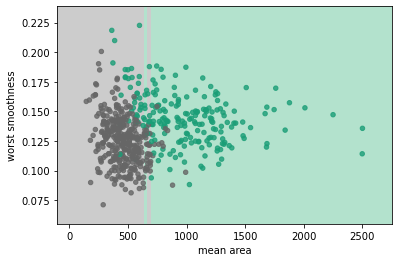

In [110]:
plot_knn(model, ma_ws, breast_cancer_target) # plotting the knn model 

# Section 3b: Refining the alternative knn model

- In this section we will refine the alternative model using GridSearchCV, like for the previous model in section 2b.

In [111]:
from sklearn.model_selection import GridSearchCV # this is the tool that searches for the best hyperparameters
from sklearn.neighbors import KNeighborsClassifier # we import our model

parameters = {
    "n_neighbors" : range(1, 51),
} # and tell the tool what parameters we want to explore
clf = GridSearchCV(KNeighborsClassifier(), parameters)
clf.fit(train_ma_ws, train_breast_cancer_target)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51)})

param_n_neighbors  mean_test_score  std_test_score  rank_test_score
17                18         0.884925        0.043111                1
22                23         0.884925        0.043111                1
23                24         0.884925        0.043111                1
24                25         0.884925        0.043111                1
32                33         0.884925        0.043111                1

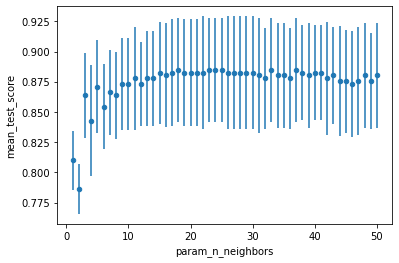

In [112]:
cv_results = pd.DataFrame(clf.cv_results_) # these are the results of the gridsearch to find the best parameters
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score") # here we can visualise the results as a scatter plot
cv_results = cv_results.sort_values(["rank_test_score", "mean_test_score"]) # here this ranks the best scores
cv_results.head()[["param_n_neighbors", "mean_test_score", "std_test_score", "rank_test_score"]] # and here we visualise these scores in a table


In [113]:
clf.score(test_ma_ws, test_breast_cancer_target) # scoring the refined model

0.9230769230769231

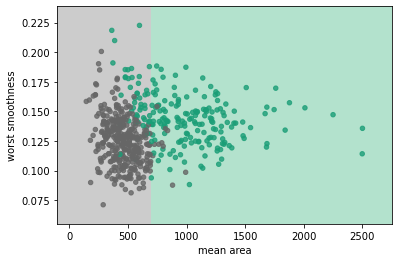

In [114]:
plot_knn(clf, ma_ws, breast_cancer_target) # plotting the refined knn model

**Now you can compare this final model with the final model from section 2b, based on their model scores.** 

**Which one is the better model for diagnosing breast cancer tumour malignancy?**